In [5]:
import pandas as pd
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [6]:
ratings = pd.read_csv('data/ratings_small.csv', encoding='utf-8', sep=',')

In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [8]:
matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
# matrix = matrix.fillna(0)
matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
A = matrix.values
A

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan]])

## Passo 1
Vamos escolher aleatoriamente um dos elementos da matriz $A$ e atribuir a ele um valor aleatório, gerando a matriz $B$, isto é, a matriz $B$ é igual à matriz $A$ com um dos elementos "estragado".

In [10]:
A.shape

(671, 9066)

In [11]:
linha = 670
coluna = 0
B = A

B[linha][coluna] = 1

print(B.shape[0])
print(B.shape[1])


671
9066


O sistema receberá como entrada a matriz $B$ e a posição $i,j$ do valor aleatório. Neste momento, ele não teve acesso à matriz $A$, e, portanto, não tem como saber qual é o valor "real".


O sistema deverá retornar o valor real que estava na matriz $A$.

In [33]:
def indices_validos(A):
    indices = []
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if not math.isnan(A[i][j]):
                indices.append([i, j])
    return indices

valid_indices = indices_validos(A)
print(random.choice(valid_indices))

[300, 1690]


In [48]:
def processo(matriz_original, indices_validos):
    ponto_aleatorio = random.choice(indices_validos)
    linha, coluna = ponto_aleatorio[0], ponto_aleatorio[1]
    valor_original = matriz_original[linha][coluna]

    matriz_original[linha][coluna] = 1

    B = matriz_original
    u, s, vt = svd(B)
    s = s
    s[:100] *= 0

    sigma = diagsvd(s, u.shape[1], vt.shape[0])
    newA = u @ sigma @ vt

    return valor_original - newA[linha][coluna]

A_ = matrix.fillna(0).values
indices_validos = indices_validos(A_)
print(processo(A_, indices_validos))

-0.7531437228145608


In [72]:
df = pd.DataFrame(columns=['erro'])

for i in range(5):
    df.loc[i] = processo(A_, indices_validos)
    print(f'Iteração {i} concluída')

df.to_csv('data/resultado.csv', index=False)

Iteração 0 concluída
Iteração 1 concluída
Iteração 2 concluída
Iteração 3 concluída
Iteração 4 concluída


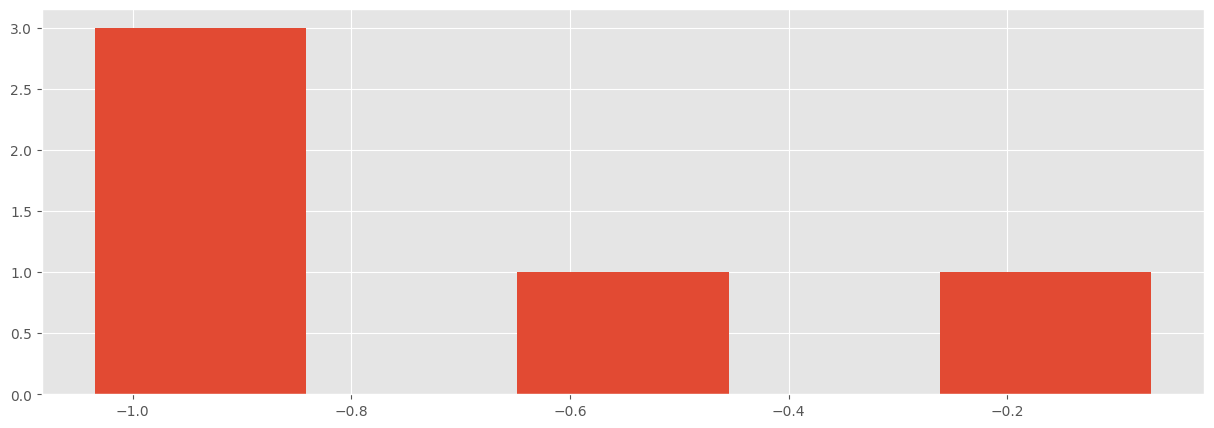

In [96]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.hist(df['erro'], bins=5)
plt.show()